2022-07-06 11:20:51.528 - [INFO] base_battery_model.build_model(859): Start building Doyle-Fuller-Newman model
2022-07-06 11:20:51.615 - [INFO] base_battery_model.build_model(879): Finish building Doyle-Fuller-Newman model
2022-07-06 11:20:51.646 - [INFO] callbacks.on_experiment_start(166): Start running experiment
2022-07-06 11:20:51.650 - [INFO] parameter_values.process_model(380): Start setting parameters for Doyle-Fuller-Newman model
2022-07-06 11:20:51.769 - [INFO] parameter_values.process_model(483): Finish setting parameters for Doyle-Fuller-Newman model
2022-07-06 11:20:51.770 - [INFO] discretisation.process_model(137): Start discretising Doyle-Fuller-Newman model
2022-07-06 11:20:52.329 - [INFO] discretisation.process_model(254): Finish discretising Doyle-Fuller-Newman model
2022-07-06 11:20:52.403 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (72.276 ms elapsed) --------------------
2022-07-06 11:20:52.405 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/1: Di

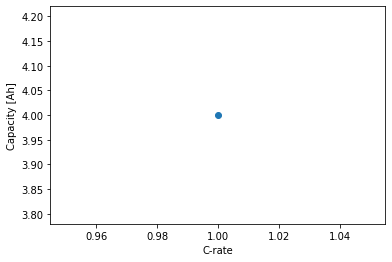

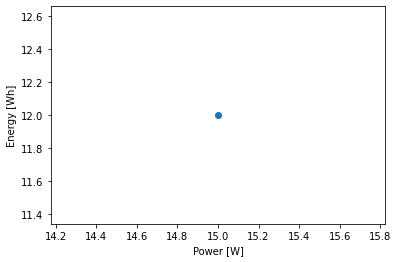

interactive(children=(FloatSlider(value=0.0, description='t', max=3554.1796540539076, step=35.541796540539075)…

In [3]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

pybamm.set_logging_level("INFO")

# load model
model = pybamm.lithium_ion.DFN()
param = pybamm.ParameterValues("Chen2020")
# solve model
C_rates = [1]
solutions = []

for i, C_rate in enumerate(C_rates):
    experiment = pybamm.Experiment(
        ["Discharge at {:.4f}C until 2.5V".format(C_rate)],
        period="{:.4f} seconds".format(10 / C_rate),
    )
    sim = pybamm.Simulation(model, parameter_values=param, experiment=experiment, solver=pybamm.CasadiSolver(mode='safe'))
    sim.solve()
    solutions.append(sim.solution)

pybamm.dynamic_plot(
    solutions,
    [
        "Terminal voltage [V]",
        "Negative particle surface concentration",
        "X-averaged negative particle surface concentration",
        "Electrolyte concentration [mol.m-3]",
    ],
)
solutions[0].save_data(
    "Chen_1C.csv", ["Time [s]", "Current [A]", "Terminal voltage [V]"], to_format="csv"
)